In [ ]:
# Example:

# Lets say we have a database [1,0,0,0]

# position 0 is 00
# position 1 is 01
# position 2 is 10
# position 3 is 11

# Goal is to find the position of 1 i.e qubit 00. 



In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np



from qiskit import IBMQ, BasicAer, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.visualization import plot_histogram

In [8]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)

groverCircuit = QuantumCircuit(qr,cr)

In [9]:
groverCircuit.h(qr)

In [10]:
groverCircuit.x(qr)
groverCircuit.cz(qr[0],qr[1])
groverCircuit.x(qr)

In [11]:
groverCircuit.h(qr)
groverCircuit.z(qr)
groverCircuit.cz(qr[0],qr[1])
groverCircuit.h(qr)

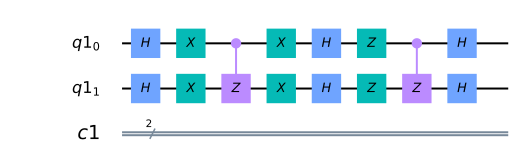

In [12]:
groverCircuit.draw(output = 'mpl')

In [13]:
backend_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(groverCircuit, backend_sim)
statevec = job_sim.result().get_statevector()
print(statevec)

[ 1.00000000e+00-2.44929360e-16j -1.06737325e-48-8.71576399e-33j
  0.00000000e+00+2.46519033e-32j  1.06737325e-48+8.71576399e-33j]


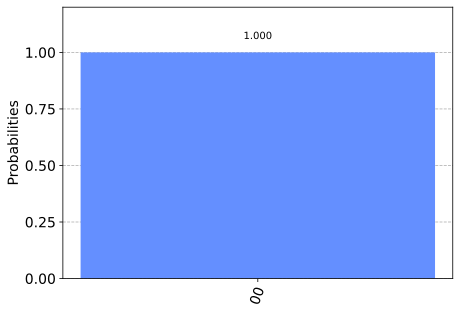

In [14]:
groverCircuit.measure(qr,cr)
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(groverCircuit, backend = backend, shots = shots).result()
answer = results.get_counts()
plot_histogram(answer)